Plot HR diagram for glob clusters

In [2]:
# Python standard-library
from urllib.parse import urlencode
from urllib.request import urlretrieve


import pandas as pd
import numpy as np
import matplotlib

# Third-party dependencies
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy.io import ascii

from IPython.display import Image

# Set up matplotlib and use a nicer set of plot parameters
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#clusters=[['ngc 2419',12],['Pal 3',12],['Pal 4',12],['ngc 4147',12],['ngc 5024',12],['M53',12],['ngc 5053',12],['ngc 5272',12]
#      ,['M3',12],['ngc 5466',12],['Pal 5',12],['ngc 5904',12],['M5',12],['Pal 14',12],['ngc 6205',12],['M13',12],
#     ['ngc 6341',12],['M92',12],['ngc 6838',12],['M71',12],['ngc 7006',12],['ngc 7078',12],['M15',12],['ngc 7089',12],['M2',12]]

clusters=[['ngc 2419',12],['Pal 3',12],['Pal 4',12],['ngc 4147',12],['ngc 5024',12],['M53',12],['ngc 5053',12],['ngc 5272',12]
      ,['M3',12],['ngc 5466',12],['Pal 5',12],['ngc 5904',12],['M5',12],['Pal 14',12],['ngc 6205',12],['M13',12],
     ['ngc 6341',12],['M92',12]]

#clusters=[['ngc 2419',2.92],['Pal 3',6.18],['Pal 4',2]]

print(len(clusters))
i=2
print(clusters[i])

sclus=clusters[i]
print(sclus[0])
print(sclus[1])
res = [None] * len(clusters)

18
['Pal 4', 12]
Pal 4
12


In [7]:
from astropy.table import Table, join, vstack
i=0
totlen=0
for clus in clusters:
    #print(clus[0])
    datfilename='globout/'+clus[0]+'.csv'
    tab=ascii.read(datfilename)
    res[i]=Table(tab, copy=True)
    #print(tab[0])
    if i<1:
        bigtable=Table(tab, copy=True)
        
    if i>0:
        #print(newbigtable.info())
        newbigtable=vstack([bigtable,tab])
        bigtable=Table(newbigtable, copy=True)
        #print()
        #print(newbigtable.info())
    i=i+1
    #newbigtable=join(bigtable,tab, join_type='outer')
    #bigtable=Table(newbigtable, copy=True)
    totlen=totlen+len(tab)
print(totlen) 
print(len(newbigtable))

18677
18677


Add an extra column to the bigtable this will be the cluster id for each star

In [8]:
print(bigtable.info())

<Table length=18677>
 name  dtype 
----- -------
objid   int64
   ra float64
  dec float64
    u float64
    g float64
    r float64
    i float64
    z float64
None


In [9]:
from astropy.table import Column,hstack,vstack
#nstars=(len(bigtable))
#print(nstars)

nstars=(len(bigtable))
print(nstars)
#bb = Column(nstars)
#newbigtable=hstack(bigtable,bb)
print((newbigtable.info()))
#bigtable.add_column(bb, name='clusterid')  # Append unnamed column to the table with 'bb' as name
#print(bigtable.size())
#clusid = Table(np.arange(1049).reshape(1049,1))
#clusid = np.array([1049,1],'i')
clusid = np.zeros((nstars,1))

i=-1
j=-1
for clus in clusters:
    i=i+1
    #j=j+1
    #print(len(clus))
    tab=res[i]
    print(len(tab))
    print(i)
    for star in range(len(tab)):
        j=j+1
        clusid[j-1][0]=i
        #i=i+1
        #print(clusid[i])
print(j)   
bb=Table(clusid)
newbigtable=hstack([bigtable,bb])    
#print(clusid[1:100])

18677
<Table length=18677>
 name  dtype 
----- -------
objid   int64
   ra float64
  dec float64
    u float64
    g float64
    r float64
    i float64
    z float64
None
1049
0
648
1
565
2
997
3
2528
4
2528
5
1252
6
153
7
153
8
1795
9
2592
10
410
11
410
12
1397
13
93
14
93
15
1007
16
1007
17
18676


In [10]:
#print(clusid[10000:10100])
print(len(clusid))
#print(newbigtable[1])
print(newbigtable[10000][8])
print(newbigtable.info())
print()
print(bb.info())

18677
9.0
<Table length=18677>
 name  dtype 
----- -------
objid   int64
   ra float64
  dec float64
    u float64
    g float64
    r float64
    i float64
    z float64
 col0 float64
None

<Table length=18677>
name  dtype 
---- -------
col0 float64
None


In [13]:
#print(tab)
#newbigtable=join(res[0],res[1], join_type='left')
#print(newbigtable)
nstars=(len(bigtable))
maxgrcolor2=max(bigtable[4][:]-bigtable[5][:])
mingrcolor2=min(bigtable[4][:]-bigtable[5][:])
maxrmag2=max(bigtable[5][:])
minrmag2=min(bigtable[5][:])

print(maxgrcolor2)
print(mingrcolor2)
print(maxrmag2)
print(minrmag2)
print()
print(newbigtable[10000][8])
mingrcolor2=-8

#set scale to compare M3 cluster with 
maxgrcolor2=-0.7
mingrcolor2=1.2
maxrmag2=21.5
minrmag2=14.5



12.116580000000003
-10021.57073
31.15484
10.12208

9.0


Write all the data to an output file

In [8]:
    outfile='globout/allglobcs.csv'
    ascii.write(newbigtable,outfile)


Draw the scatter diagram

[0.5 0.  1.  1. ]


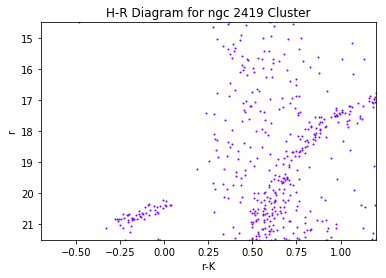

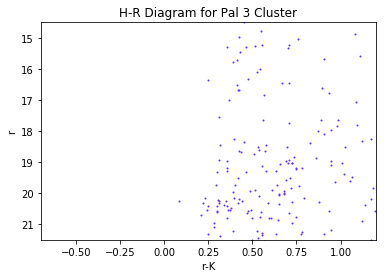

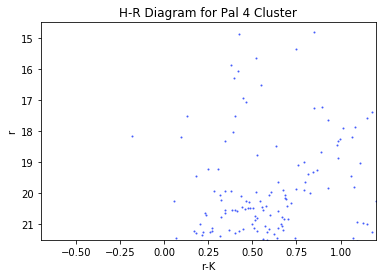

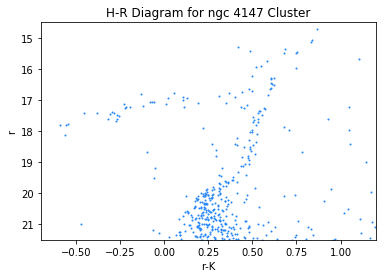

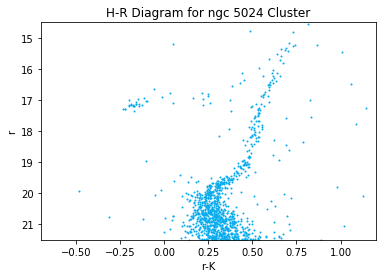

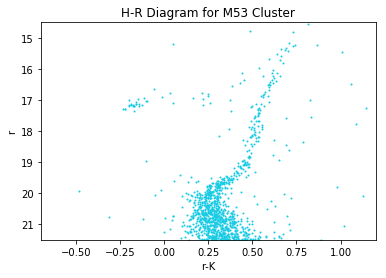

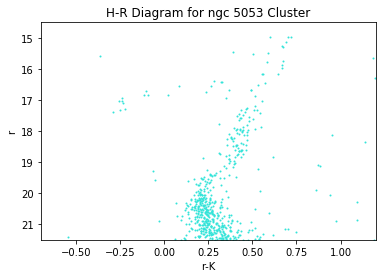

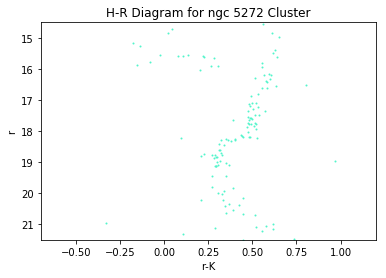

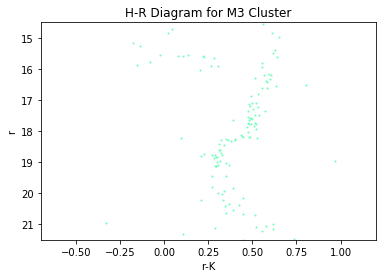

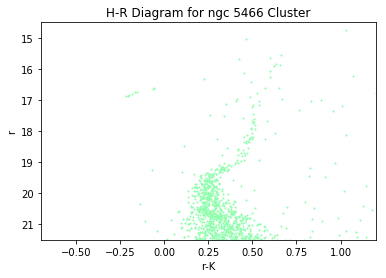

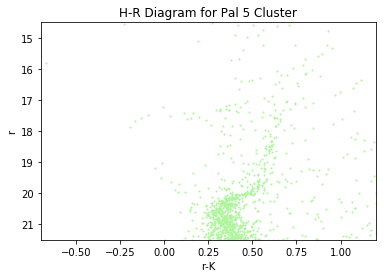

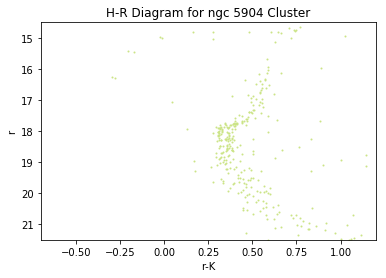

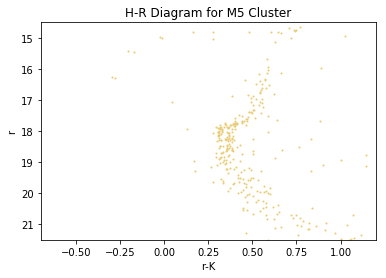

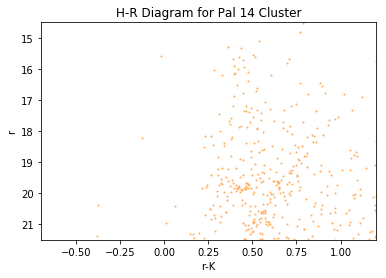

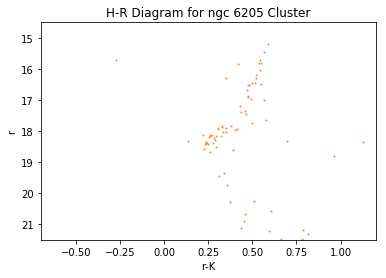

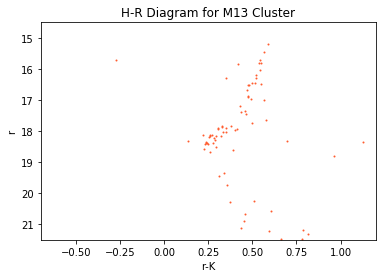

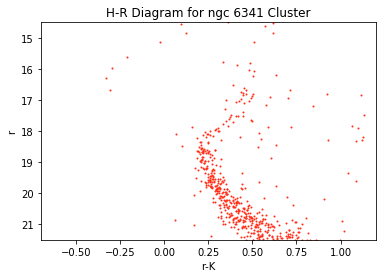

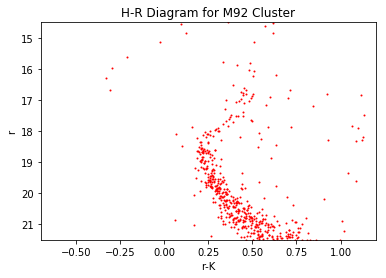

In [14]:
import matplotlib.cm as cm
i=0
#colors = np.random.rand(len(clusters))
rmag2 = [None] * len(clusters)
grcolor2 = [None] * len(clusters)
colors = cm.rainbow(np.linspace(0, 1, len(clusters)))
print(colors[0])
#colmaps = ['Blues', 'Greys', 'Reds']
#plt.figure()
for clus in clusters:
    c=colors[i]
    cres=res[i]
    rmag2[i] = cres[5][:]
    grcolor2[i] = cres[4][:] -cres[5][:]
    #print(rmag2)
    #print(grcolor2)
    
    
    plt.figure(i)
    plt.scatter(grcolor2[i], rmag2[i],s=1,color=c)
    plt.xlabel('r-K')
    plt.ylabel('r')
    thetitle='H-R Diagram for '+clus[0]+' Cluster'
    plt.title(thetitle)
    
    #plt.xlim(max(grcolor2[i]), min(grcolor2[i]))
    plt.xlim(maxgrcolor2,mingrcolor2)
    plt.ylim(maxrmag2, minrmag2)
    plt.show()
    i=i+1
nclus=i


[0.5 0.  1.  1. ]


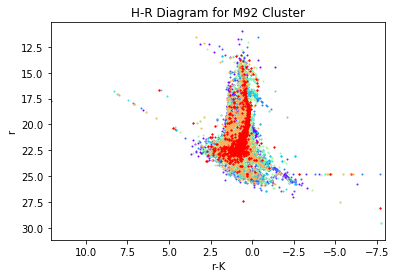

In [10]:
i=0
#colors = np.random.rand(len(clusters))
rmag2 = [None] * len(clusters)
grcolor2 = [None] * len(clusters)
colors = cm.rainbow(np.linspace(0, 1, len(clusters)))
print(colors[0])
#colmaps = ['Blues', 'Greys', 'Reds']
plt.figure()
for clus in clusters:
    c=colors[i]
    cres=res[i]
    rmag2[i] = cres[5][:]
    grcolor2[i] = cres[4][:] -cres[5][:]
    #print(rmag2)
    #print(grcolor2)
    
    
    #plt.figure(i)
    plt.scatter(grcolor2[i], rmag2[i],s=1,color=c)
    plt.xlabel('r-K')
    plt.ylabel('r')
    thetitle='H-R Diagram for '+clus[0]+' Cluster'
    plt.title(thetitle)
    
    #plt.xlim(max(grcolor2[i]), min(grcolor2[i]))
    plt.xlim(maxgrcolor2,mingrcolor2)
    plt.ylim(maxrmag2, minrmag2)
    #plt.show()
    i=i+1
nclus=i
plt.show()

18

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [3.82352941e-01 1.83749518e-01 9.95734176e-01 1.00000000e+00]
 [2.64705882e-01 3.61241666e-01 9.82973100e-01 1.00000000e+00]
 [1.47058824e-01 5.26432163e-01 9.61825643e-01 1.00000000e+00]
 [2.94117647e-02 6.73695644e-01 9.32472229e-01 1.00000000e+00]
 [8.82352941e-02 7.98017227e-01 8.95163291e-01 1.00000000e+00]
 [2.05882353e-01 8.95163291e-01 8.50217136e-01 1.00000000e+00]
 [3.23529412e-01 9.61825643e-01 7.98017227e-01 1.00000000e+00]
 [4.41176471e-01 9.95734176e-01 7.39008917e-01 1.00000000e+00]
 [5.58823529e-01 9.95734176e-01 6.73695644e-01 1.00000000e+00]
 [6.76470588e-01 9.61825643e-01 6.02634636e-01 1.00000000e+00]
 [7.94117647e-01 8.95163291e-01 5.26432163e-01 1.00000000e+00]
 [9.11764706e-01 7.98017227e-01 4.45738356e-01 1.00000000e+00]
 [1.00000000e+00 6.73695644e-01 3.61241666e-01 1.00000000e+00]
 [1.00000000e+00 5.26432163e-01 2.73662990e-01 1.00000000e+00]
 [1.00000000e+00 3.61241666e-01 1.83749518e-01 1.00

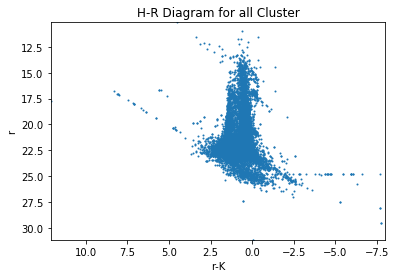

In [11]:
import matplotlib.cm as cm
i=0
print(nclus)
colorss = [None] * nstars
#colors = np.random.rand(len(clusters))
rmag3 = np.zeros((nstars,1))
grcolor3 = np.zeros((nstars,1))
colors = cm.rainbow(np.linspace(0, 1, nclus))
for j in range(0, nstars-1):
    #print(int(newbigtable[j][8]))
    colorss[j]=colors[int(newbigtable[j][8])]

    
print()
print(colors)
print(colors[8])
print()
#colmaps = ['Blues', 'Greys', 'Reds']
#c=colors[i]
cres=newbigtable
rmag3 = cres[5][:]
grcolor3 = cres[4][:] -cres[5][:]
#c=colors[int(cres[8][:])]
    #print(rmag2)
    #print(grcolor2)
    
    
plt.figure
plt.scatter(grcolor3, rmag3,s=1)
plt.xlabel('r-K')
plt.ylabel('r')
thetitle='H-R Diagram for all Cluster'
plt.title(thetitle)
    
#plt.xlim(max(grcolor2[i]), min(grcolor2[i]))
plt.xlim(maxgrcolor2,mingrcolor2)
plt.ylim(maxrmag2, minrmag2)
plt.show()


In [12]:
print(bigtable)

       objid               ra              dec        ...    i        z    
------------------- ---------------- ---------------- ... -------- --------
1237651328250675382 114.540318104927 38.8780298649691 ... 16.46062 16.16641
1237651328250675401 114.542105086647 38.8784372962378 ... 17.22687 17.02503
1237651328250675392  114.53158306445 38.8928223743677 ... 16.54561  16.3093
1237651328250675397 114.534702956968 38.8889321489952 ... 16.89501 16.68201
1237651328250675403 114.545267743922 38.8783031557603 ...  17.1831  17.1048
1237651328250675414 114.530640240602 38.8912328755857 ... 17.23579 17.04205
1237651328250675386 114.524939928866 38.8937634712946 ... 16.43089  16.1905
1237651328250675387 114.538968879407 38.8694563860777 ... 16.51571 16.24088
1237651328250675390 114.528610702075 38.8926535926362 ... 16.48916 16.21893
1237651328250675398 114.520325570396 38.8754133204607 ... 16.97382 16.73075
                ...              ...              ... ...      ...      ...
123766867884